In [325]:
import yfinance as yf
import pandas as pd
import numpy as np

In [326]:
name = 'EA'
ea_stock = yf.download(name, start='2020-04-20', end='2025-03-18')

company = yf.Ticker(name)
balance_sheet = company.balance_sheet
statement = company.financials

ea_data = pd.DataFrame(ea_stock)


print(ea_data.shape)
ea_data.tail(10)


[*********************100%***********************]  1 of 1 completed

(1234, 5)


Price,Close,High,Low,Open,Volume
Ticker,EA,EA,EA,EA,EA
Date,,,,,
2025-03-04,131.820007,133.350006,129.240005,129.520004,4291000
2025-03-05,134.050003,134.509995,131.309998,131.600006,5218000
2025-03-06,136.789993,137.529999,133.369995,133.649994,3676700
2025-03-07,140.039993,140.419998,136.000000,136.190002,3356800
2025-03-10,140.429993,142.970001,139.220001,139.750000,5440900
2025-03-11,137.880005,140.899994,136.899994,140.899994,3837200
2025-03-12,136.119995,138.149994,135.729996,137.000000,3177500
2025-03-13,137.720001,138.259995,135.229996,135.789993,3165100


# P/E and P/B ratio calculation

In [327]:
net_income = statement.loc['Net Income'].iloc[0]
share = balance_sheet.loc['Share Issued'].iloc[0]

earning_per_share = net_income / share
price_per_share = ea_stock['Close']

P_E_ratio = price_per_share / earning_per_share

book_value = balance_sheet.loc['Total Assets'].iloc[0] - balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0]
shares_outstanding = company.info['sharesOutstanding']
book_value_per_share = book_value / shares_outstanding

P_B_ratio = price_per_share / book_value_per_share

ea_data['P/B ratio'] = P_B_ratio['EA']
ea_data['P/E ratio'] = P_E_ratio['EA']


print('P/E ratio for EA is: ' + str(P_E_ratio['EA'].iloc[0]))
print('P/B ratio for EA is: ' + str(P_B_ratio['EA'].iloc[0]))

ea_data.tail(5)

P/E ratio for EA is: 23.55915529239882
P/B ratio for EA is: 3.905526700567568


Price,Close,High,Low,Open,Volume,P/B ratio,P/E ratio
Ticker,EA,EA,EA,EA,EA,,
Date,,,,,,,
2025-03-11,137.880005,140.899994,136.899994,140.899994,3837200,4.782911,28.851767
2025-03-12,136.119995,138.149994,135.729996,137.000000,3177500,4.721858,28.483480
2025-03-13,137.720001,138.259995,135.229996,135.789993,3165100,4.777361,28.818286
2025-03-14,138.710007,139.229996,137.869995,138.149994,3065500,4.811703,29.025447
2025-03-17,142.899994,143.369995,138.600006,138.979996,4510500,4.957049,29.902213


# Discounted Cash Flow

In [328]:
cash_flow = company.cashflow
free_cash_flow = cash_flow.loc['Free Cash Flow'].iloc[0]
shares_outstanding = company.info['sharesOutstanding']

#### WACC for getting discount rate for DCF

In [329]:
#Assumptions
risk_free_rate = 0.04
market_return = 0.10
cost_of_debt = 0.05
tax_rate = 0.21

equity_risk_premium = market_return - risk_free_rate
beta = company.info.get("beta", 1.0)
cost_of_equity = risk_free_rate + beta * equity_risk_premium

market_cap = company.info.get("marketCap", 0)
total_debt = company.info.get("totalDebt", 0)
cash = company.info.get("totalCash", 0)
enterprise_value = market_cap + total_debt - cash

E = market_cap
D = total_debt
V = E + D
debt_weight = D / V
equity_weight = E / V

cost_of_debt = 0.05
tax_rate = 0.21


wacc = (equity_weight * cost_of_equity) + (debt_weight * cost_of_debt * (1 - tax_rate))

In [330]:
discount_rate = wacc  
growth_rate = 0.05  
years = 5  

future_cash_flows = []
for year in range(1, years + 1):
    future_cash_flow_value = free_cash_flow * ((1 + growth_rate) ** year)
    future_cash_flows.append(future_cash_flow_value)
    
dcf_values = []  
for year, fcf in enumerate(future_cash_flows, start=1):
    dcf_value = fcf / (1 + discount_rate) ** year
    dcf_values.append(dcf_value)
    
dcf_values = [fcf / (1 + discount_rate) ** year for year, fcf in enumerate(future_cash_flows, start=1)]

terminal_value = future_cash_flows[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
discounted_terminal_value = terminal_value / (1 + discount_rate) ** years
total_dcf = sum(dcf_values) + discounted_terminal_value

# DCF per share
dcf_per_share = total_dcf / shares_outstanding

# Output the results
print('Total DCF: ' + str(total_dcf))
print('DCF per share: ' + str(dcf_per_share))

Total DCF: 64346221834.66277
DCF per share: 246.89860959205723


In [331]:
ea_data.tail(5)

Price,Close,High,Low,Open,Volume,P/B ratio,P/E ratio
Ticker,EA,EA,EA,EA,EA,,
Date,,,,,,,
2025-03-11,137.880005,140.899994,136.899994,140.899994,3837200,4.782911,28.851767
2025-03-12,136.119995,138.149994,135.729996,137.000000,3177500,4.721858,28.483480
2025-03-13,137.720001,138.259995,135.229996,135.789993,3165100,4.777361,28.818286
2025-03-14,138.710007,139.229996,137.869995,138.149994,3065500,4.811703,29.025447
2025-03-17,142.899994,143.369995,138.600006,138.979996,4510500,4.957049,29.902213


The stock appears to be undervalued based on your DCF analysis.

# ROE, CAGR and Debt-To-Equity for assesing growth

In [332]:
net_income = statement.loc['Net Income']  # Net income from the income statement
total_equity = balance_sheet.loc["Stockholders Equity"]  # Total equity from the balance sheet

# Calculate ROE for each year
roe = net_income / total_equity
print("Return on Equity (ROE) for the last 5 years:")
print(roe)


current_stock_price = company.history(period="1d")['Close'].iloc[0]
print('Current stock price: ' + str(current_stock_price))

Return on Equity (ROE) for the last 5 years:
2024-03-31     0.16944
2023-03-31    0.109968
2022-03-31    0.103475
2021-03-31     0.10676
dtype: object
Current stock price: 145.8699951171875


In [333]:
ea_data.head()

Price,Close,High,Low,Open,Volume,P/B ratio,P/E ratio
Ticker,EA,EA,EA,EA,EA,,
Date,,,,,,,
2020-04-20,112.587090,113.679690,111.133529,112.031025,2946100,3.905527,23.559155
2020-04-21,110.499397,113.357729,109.367775,111.874912,2483200,3.833107,23.122300
2020-04-22,111.767639,112.255409,108.460559,111.562777,2558900,3.877101,23.387683
2020-04-23,111.660324,113.777244,110.909161,111.894452,2737700,3.873378,23.365227
2020-04-24,113.465073,113.826025,111.299372,112.840728,1753800,3.935983,23.742876


# Data Interpretation Report & Graphs

### EA

In [334]:
import matplotlib.pyplot as plt

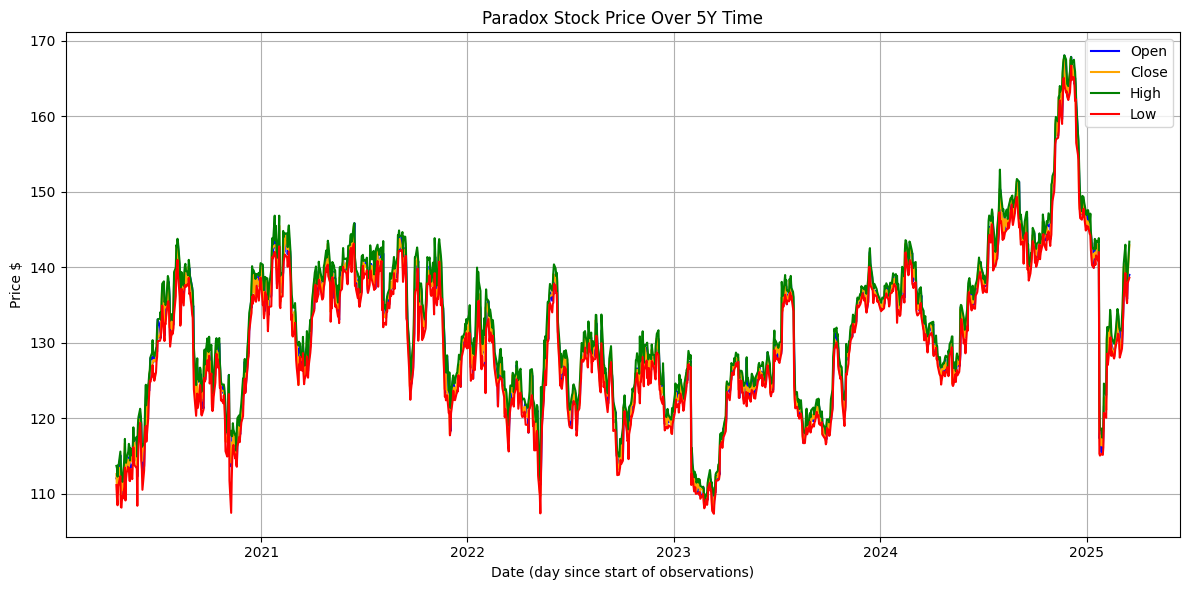

In [335]:
#Stock Price over time. At Open, Close, Hisg and Low

plt.figure(figsize=(12, 6))

plt.plot(ea_data.index, ea_data["Open"], label="Open", color = "Blue")
plt.plot(ea_data.index, ea_data["Close"], label="Close", color = "Orange")
plt.plot(ea_data.index, ea_data["High"], label="High", color = "Green")
plt.plot(ea_data.index, ea_data["Low"], label="Low", color = "Red")

plt.xlabel("Date (day since start of observations)")
plt.ylabel("Price $")
plt.title("Paradox Stock Price Over 5Y Time")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

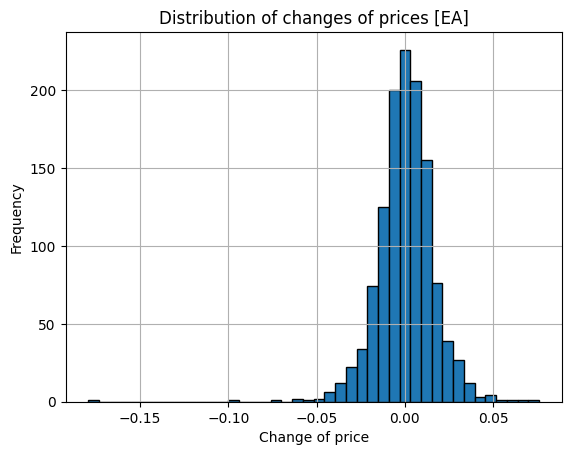

In [336]:
#Daily change of Prices for EA
open_dif = ea_data["Open"].pct_change().dropna() 

plt.hist(open_dif, bins=42, edgecolor='black')
plt.xlabel("Change of price")
plt.ylabel("Frequency")
plt.title("Distribution of changes of prices [EA]")
plt.grid(True)

plt.show()

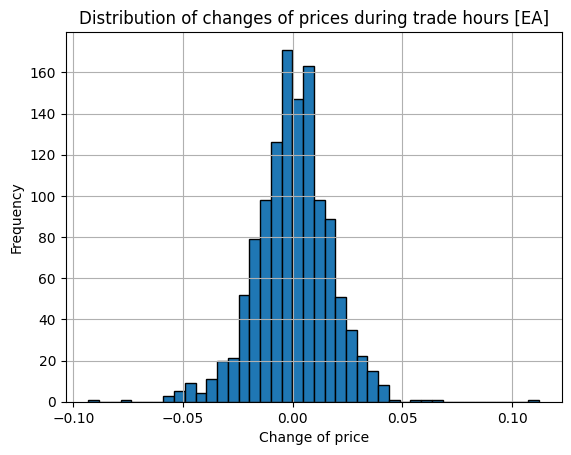

In [337]:
#Changes values from during trading hours
open_dif = (ea_data["Close"] - ea_data["Open"] )/ 100 

plt.hist(open_dif, bins=42, edgecolor='black')
plt.xlabel("Change of price")
plt.ylabel("Frequency")
plt.title("Distribution of changes of prices during trade hours [EA]")
plt.grid(True)

plt.show()

In [338]:
#adding this to the graph
ea_data[("delta_trading_hours", "")] = ea_data[("Close", "EA")] - ea_data[("Open", "EA")]
ea_data[("delta_non_trading_hours", "")] = ea_data[("Open", "EA")].shift(-1) - ea_data[("Close", "EA")]

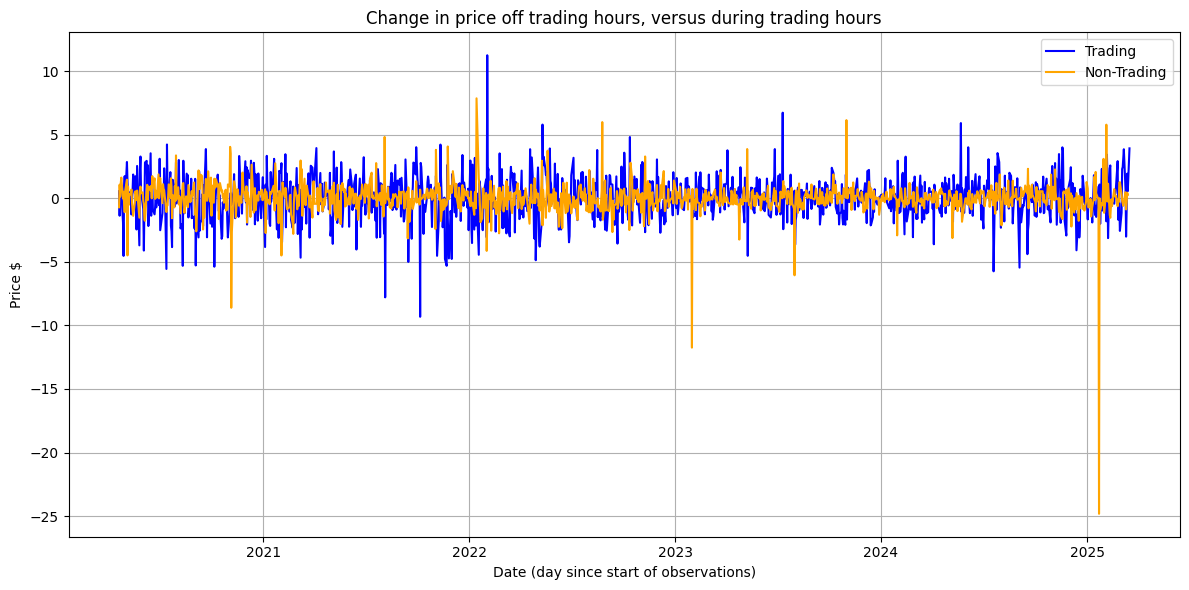

In [339]:
#plotting the trend as a line graph
plt.figure(figsize=(12, 6))

plt.plot(ea_data.index, ea_data["delta_trading_hours"], label="Trading", color = "Blue")
plt.plot(ea_data.index, ea_data["delta_non_trading_hours"], label="Non-Trading", color = "Orange")

plt.xlabel("Date (day since start of observations)")
plt.ylabel("Price $")
plt.title("Change in price off trading hours, versus during trading hours")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

In [340]:
temp = ea_data[("delta_trading_hours", "")]

mean_val = temp.mean()
median_val = temp.median()
mode_val = temp.mode().iloc[0]

print("mean:",mean_val)
print("medain:", median_val)
print("mode:", mode_val)

mean: 0.012917091083717299
medain: 0.0
mode: 0.0


In [341]:
temp = ea_data[("delta_non_trading_hours", "")]

mean_val = temp.mean()
median_val = temp.median()
mode_val = temp.mode().iloc[0]

print("mean:",mean_val)
print("medain:",  median_val)
print("mode:", mode_val)

mean: 0.012108093250294157
medain: 0.019505602647015508
mode: -24.814161846537615


In [342]:
#Let us compare them statistically

from scipy.stats import ttest_ind
from scipy.stats import levene

stat, p_value = ttest_ind(ea_data[("delta_non_trading_hours", "")], ea_data[("delta_trading_hours", "")], nan_policy='omit', equal_var = False)  #T-TEST, nan omit cause else NaN (From last value where no next day to caclualte changer) 
print("T-test p-value (mean difference):", p_value)

T-test p-value (mean difference): 0.9894506243647878


In [343]:
stat_var, p_var = levene(ea_data[("delta_non_trading_hours", "")], ea_data[("delta_trading_hours", "")], center='mean', nan_policy='omit')
print("Levene’s test p-value (variance difference):", p_var)

Levene’s test p-value (variance difference): 6.109428621512239e-39


Variances differ strongly, means do not

In [344]:
a = ea_data[("P/E ratio", "")]
b = ea_data[("Volume", "EA")]
corr = a.corr(b, method='pearson')
print(f"Correlation between P/E and volume: {corr:.4f}")

Correlation between P/E and volume: -0.1396


In [345]:
a = ea_data[("Open", "EA")]
b = ea_data[("Volume", "EA")]
corr = a.corr(b, method='pearson')
print(f"Correlation between stock price and volume: {corr:.4f}")

Correlation between stock price and volume: -0.1373


## Paradox Interactive

In [346]:
name = 'ETA.F'
paradox_stock = yf.download(name, start='2020-04-20', end='2025-03-18')

company = yf.Ticker(name)
balance_sheet = company.balance_sheet
statement = company.financials

paradox_data = pd.DataFrame(paradox_stock)
paradox_data.tail(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ETA.F,ETA.F,ETA.F,ETA.F,ETA.F
Date,,,,,
2025-03-04,17.760000,18.020000,17.760000,18.020000,72
2025-03-05,17.610001,17.610001,17.610001,17.610001,0
2025-03-06,17.469999,17.469999,17.469999,17.469999,0
2025-03-07,17.170000,17.170000,17.170000,17.170000,0
2025-03-10,17.150000,17.200001,17.150000,17.200001,25
2025-03-11,16.900000,16.900000,16.900000,16.900000,0
2025-03-12,16.870001,16.870001,16.870001,16.870001,0
2025-03-13,16.940001,16.940001,16.940001,16.940001,0


In [347]:
paradox_data.shape

(1253, 5)

In [376]:
net_income = statement.loc['Net Income'].iloc[0]
share = balance_sheet.loc['Share Issued'].iloc[0]

earning_per_share = net_income / share
price_per_share = paradox_stock['Close']

P_E_ratio = price_per_share / earning_per_share

book_value = balance_sheet.loc['Total Assets'].iloc[0] - balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0]
shares_outstanding = company.info['sharesOutstanding']
book_value_per_share = book_value / shares_outstanding

P_B_ratio = price_per_share / book_value_per_share

paradox_data['P/B ratio'] = P_B_ratio['ETA.F']
paradox_data['P/E ratio'] = P_E_ratio['ETA.F']


print('P/E ratio for paradox is: ' + str(P_E_ratio['ETA.F'].iloc[0]))
print('P/B ratio for paradox is: ' + str(P_B_ratio['ETA.F'].iloc[0]))

paradox_data.tail(5)

P/E ratio for paradox is: 1.9152535955447223
P/B ratio for paradox is: 0.3848278873093709


Price,Close,High,Low,Open,Volume,P/B ratio,P/E ratio,delta_trading_hours,delta_non_trading_hours
Ticker,ETA.F,ETA.F,ETA.F,ETA.F,ETA.F,,,,
Date,,,,,,,,,
2025-03-11,16.900000,16.900000,16.900000,16.900000,0,0.613488,3.053273,0.0,-0.029999
2025-03-12,16.870001,16.870001,16.870001,16.870001,0,0.612399,3.047854,0.0,0.070000
2025-03-13,16.940001,16.940001,16.940001,16.940001,0,0.614940,3.060500,0.0,0.080000
2025-03-14,17.020000,17.020000,17.020000,17.020000,0,0.617844,3.074954,0.0,0.150000
2025-03-17,17.170000,17.170000,17.170000,17.170000,0,0.623289,3.102054,0.0,NaN


In [377]:
paradox_data.shape

(1253, 9)

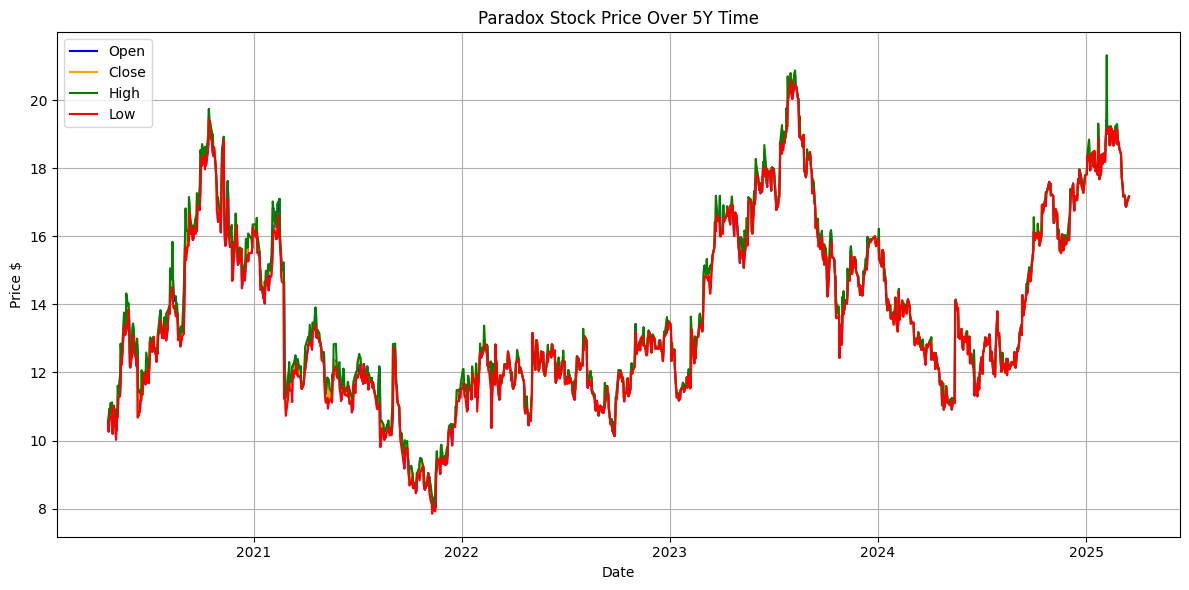

In [378]:
#Stock Price over time. At Open, Close, Hisg and Low

plt.figure(figsize=(12, 6))

plt.plot(paradox_data.index, paradox_data["Open"], label="Open", color = "Blue")
plt.plot(paradox_data.index, paradox_data["Close"], label="Close", color = "Orange")
plt.plot(paradox_data.index, paradox_data["High"], label="High", color = "Green")
plt.plot(paradox_data.index, paradox_data["Low"], label="Low", color = "Red")

plt.xlabel("Date")
plt.ylabel("Price $")
plt.title("Paradox Stock Price Over 5Y Time")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

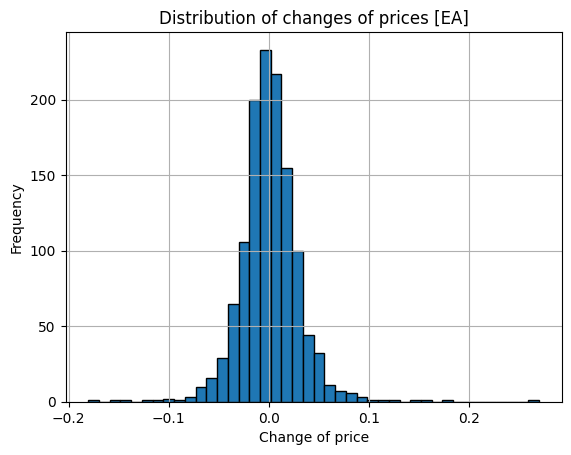

In [379]:
#Daily change of Prices for EA
open_dif = paradox_data["Open"].pct_change().dropna() 

plt.hist(open_dif, bins=42, edgecolor='black')
plt.xlabel("Change of price")
plt.ylabel("Frequency")
plt.title("Distribution of changes of prices [EA]")
plt.grid(True)

plt.show()

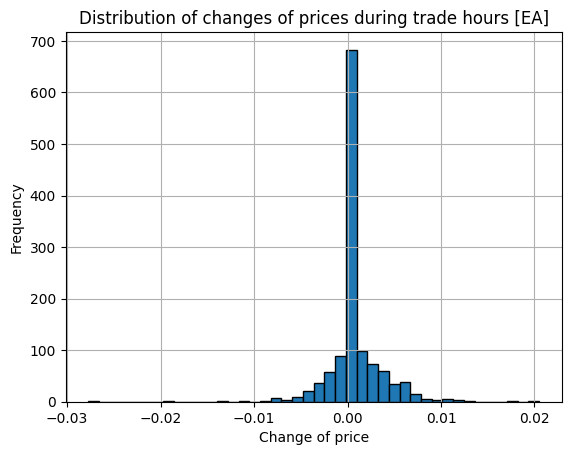

In [380]:
open_dif = (paradox_data["Close"] - paradox_data["Open"] )/ 100 

plt.hist(open_dif, bins=42, edgecolor='black')
plt.xlabel("Change of price")
plt.ylabel("Frequency")
plt.title("Distribution of changes of prices during trade hours [EA]")
plt.grid(True)

plt.show()

Removing most extremem outliars. The central column stays, bexause it is frequency. and more often than not it was around 0

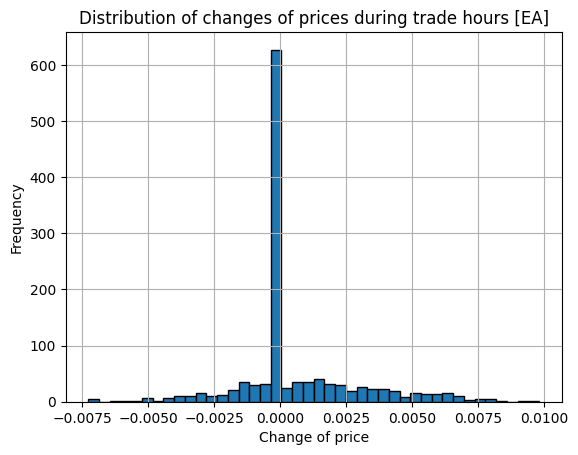

In [381]:
a = open_dif.quantile(0.01)
b = open_dif.quantile(0.99)
temp = open_dif[(open_dif > a) & (open_dif < b)]

plt.hist(temp, bins=42, edgecolor='black')
plt.xlabel("Change of price")
plt.ylabel("Frequency")
plt.title("Distribution of changes of prices during trade hours [EA]")
plt.grid(True)

plt.show()

In [382]:
#Trading vs non trading hours change in price over the entire duartion of the said period
paradox_data[("delta_trading_hours", "")] = paradox_data[("Close", "ETA.F")] - paradox_data[("Open", "ETA.F")]
paradox_data[("delta_non_trading_hours", "")] = paradox_data[("Open", "ETA.F")].shift(-1) - paradox_data[("Close", "ETA.F")]

In [383]:
temp = paradox_data[("delta_trading_hours", "")]

mean_val = temp.mean()
median_val = temp.median()
mode_val = temp.mode().iloc[0]

print("mean:",mean_val)
print("medain:", median_val)
print("mode:", mode_val)

mean: 0.06166496561234704
medain: 0.0
mode: 0.0


In [384]:
temp = paradox_data[("delta_non_trading_hours", "")]

mean_val = temp.mean()
median_val = temp.median()
mode_val = temp.mode().iloc[0]

print("mean:",mean_val)
print("medain:", median_val)
print("mode:", mode_val)

mean: -0.05641892815399348
medain: -0.06306221365259113
mode: 0.0


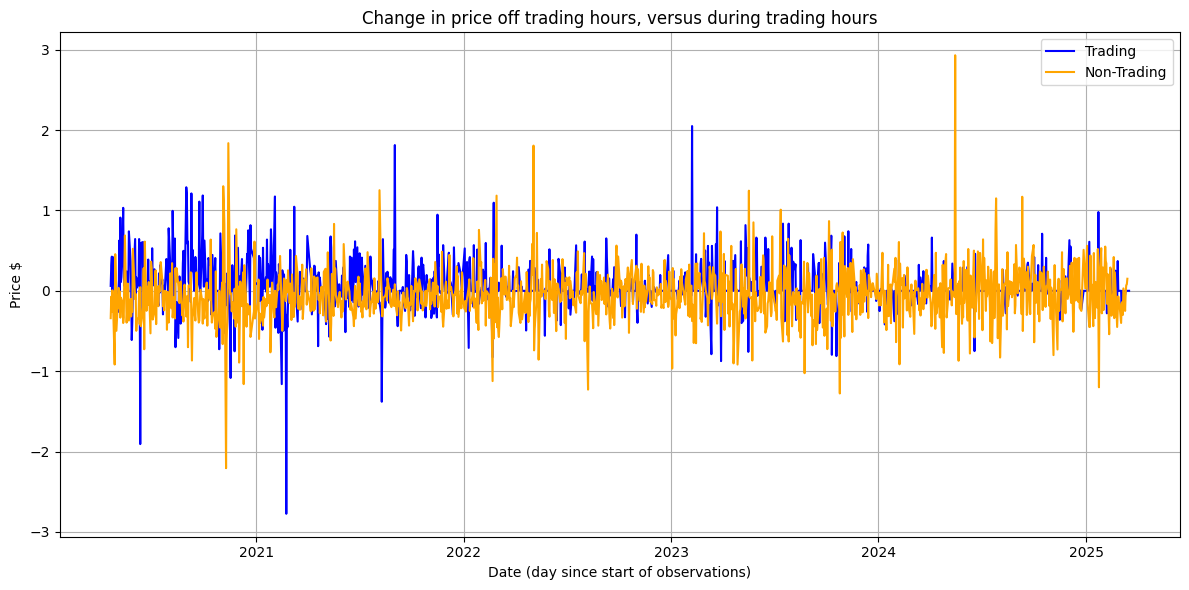

In [385]:
plt.figure(figsize=(12, 6))

plt.plot(paradox_data.index, paradox_data["delta_trading_hours"], label="Trading", color = "Blue")
plt.plot(paradox_data.index, paradox_data["delta_non_trading_hours"], label="Non-Trading", color = "Orange")

plt.xlabel("Date (day since start of observations)")
plt.ylabel("Price $")
plt.title("Change in price off trading hours, versus during trading hours")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

In [386]:
#Let us compare them statistically again but this time for paradox

from scipy.stats import ttest_ind
from scipy.stats import levene

stat, p_value = ttest_ind(paradox_data[("delta_non_trading_hours", "")], paradox_data[("delta_trading_hours", "")], nan_policy='omit', equal_var = False)  #T-TEST, nan omit cause else NaN (From last value where no next day to caclualte changer) 
print("T-test p-value (mean difference):", p_value)
stat_var, p_var = levene(paradox_data[("delta_non_trading_hours", "")], paradox_data[("delta_trading_hours", "")], center='mean', nan_policy='omit')
print("Levene’s test p-value (variance difference):", p_var)

T-test p-value (mean difference): 5.2246857610197784e-21
Levene’s test p-value (variance difference): 3.4132578535262337e-09


In [387]:
#Both mean and median differ and it is very statistically significant , assuming deafult therlond 0.05 the values we get are way below
#Especially for the first part where we even used Welch test for extra safety (We do not assume equal pop variance)

In [388]:
#Now let us find the correlation in the stock prices

In [389]:
c = ea_data[("Close", "EA")].corr(paradox_data[("Close", "ETA.F")])

print(f"Correlation coefficient between EA stock price and pradox stock price: {c:.4f}")
#This cofferlation coeficient (pearsons is quite low) so stock would go somewhat well toether in a portfoloio (From this standpoint)

Correlation coefficient between EA stock price and pradox stock price: 0.0579


Minimizing the individual risk, yet market risk stays the same. And 2 stock is defenitely now enought for a solid proftolio.

In [390]:
#Some additional statistic to see how change of price during and of work wours correlated
c = paradox_data[("delta_non_trading_hours", "")].corr(paradox_data[("delta_trading_hours", "")])
c

-0.18710160925347047

In [391]:
c = ea_data[("delta_non_trading_hours", "")].corr(ea_data[("delta_trading_hours", "")])
c

-0.013266012668934943

In [392]:
#Both are invesely correlated, for paradox change in more significantly

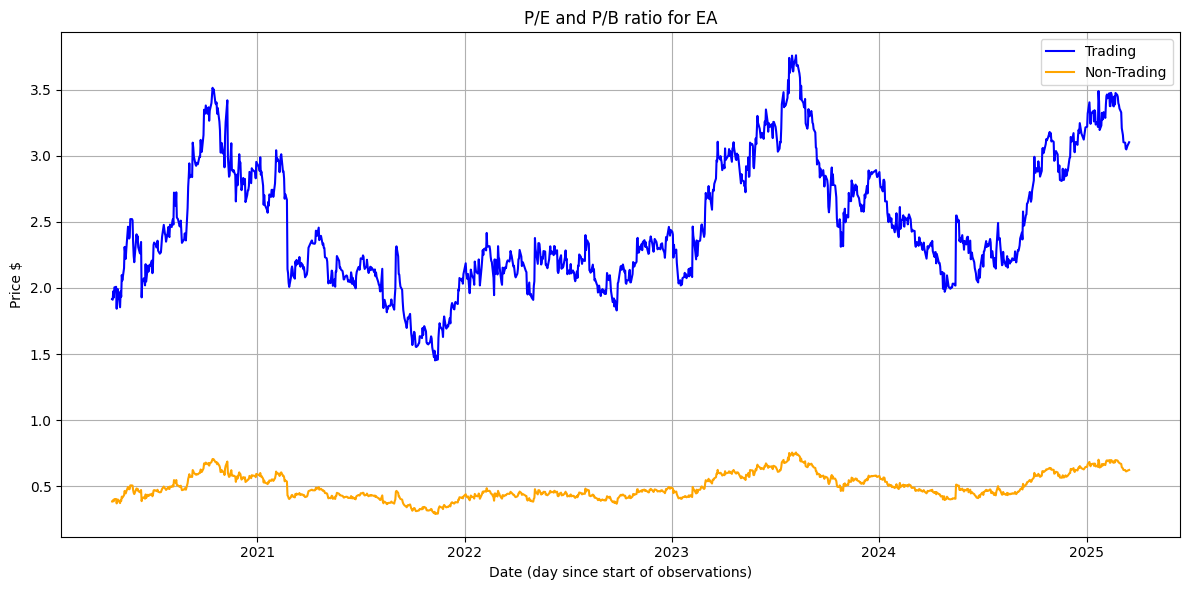

In [393]:
plt.figure(figsize=(12, 6))

plt.plot(paradox_data.index, paradox_data['P/E ratio'], label="Trading", color = "Blue")
plt.plot(paradox_data.index, paradox_data["P/B ratio"], label="Non-Trading", color = "Orange")

plt.xlabel("Date (day since start of observations)")
plt.ylabel("Price $")
plt.title("P/E and P/B ratio for EA")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

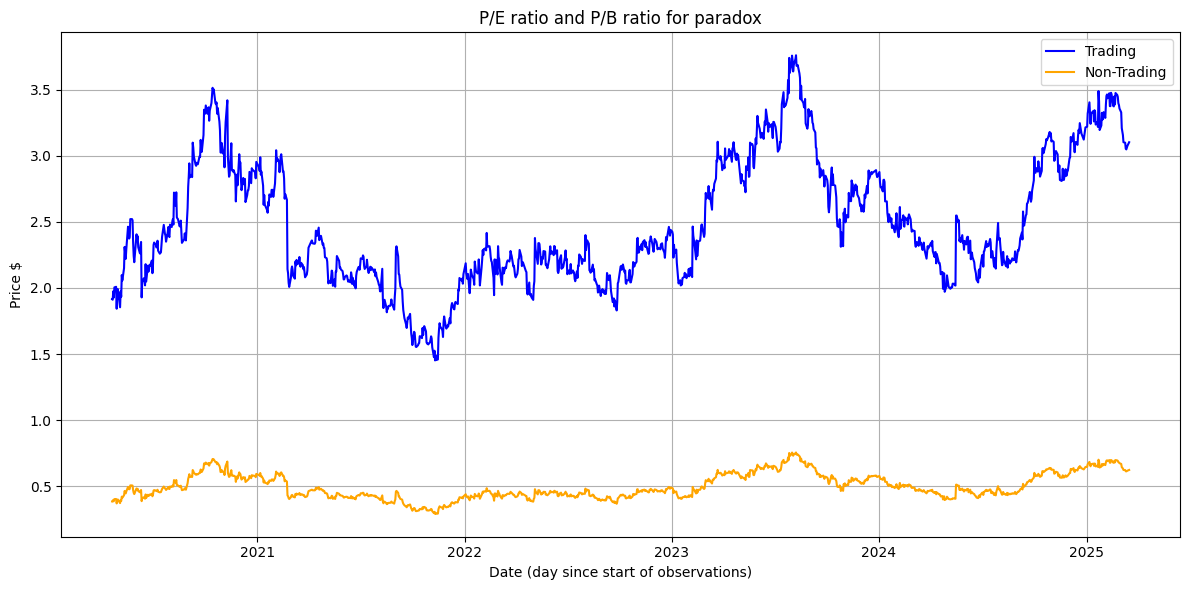

In [394]:
plt.figure(figsize=(12, 6))

plt.plot(paradox_data.index, paradox_data['P/E ratio'], label="Trading", color = "Blue")
plt.plot(paradox_data.index, paradox_data["P/B ratio"], label="Non-Trading", color = "Orange")

plt.xlabel("Date (day since start of observations)")
plt.ylabel("Price $")
plt.title("P/E ratio and P/B ratio for paradox")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

In [395]:
ea_data.shape


(1234, 9)

In [396]:
paradox_data.shape

(1253, 9)

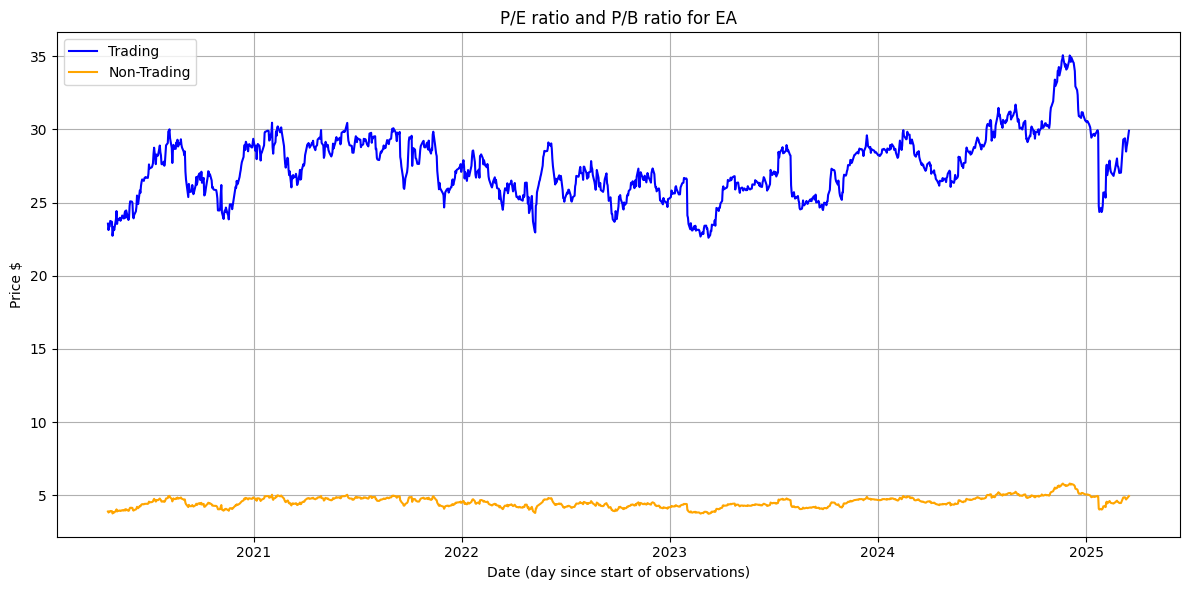

In [397]:
plt.figure(figsize=(12, 6))

plt.plot(ea_data.index, ea_data['P/E ratio'], label="ea ", color = "Blue")
plt.plot(ea_data.index, ea_data["P/B ratio"], label="Non-Trading", color = "Orange")

plt.xlabel("Date (day since start of observations)")
plt.ylabel("Price $")
plt.title("P/E ratio and P/B ratio for EA")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

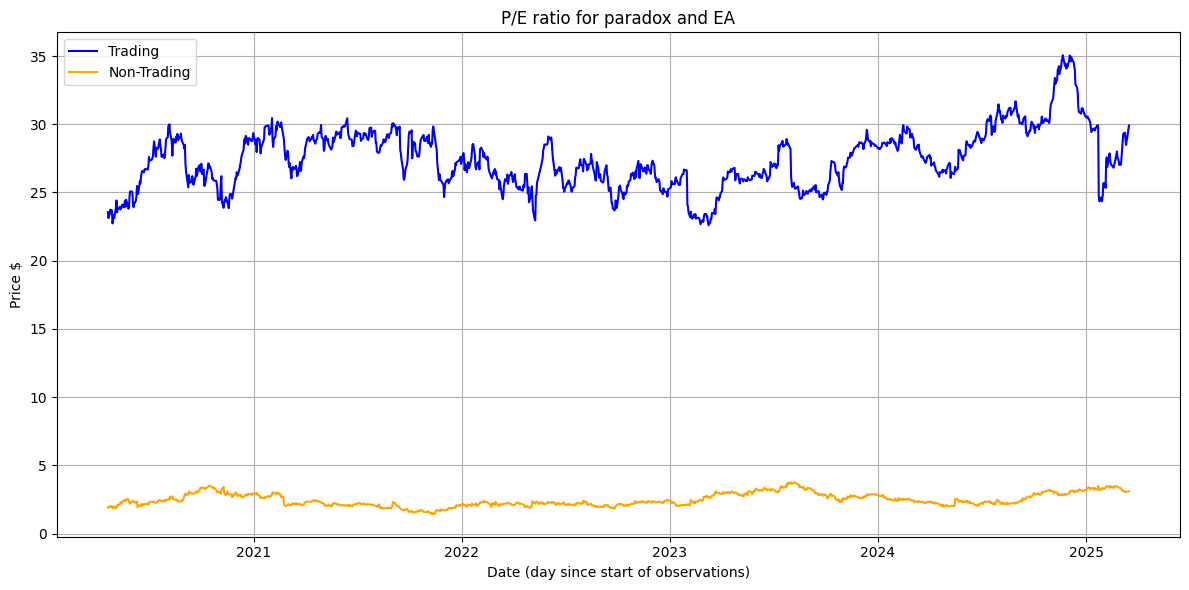

In [398]:
plt.figure(figsize=(12, 6))

plt.plot(ea_data.index, ea_data['P/E ratio'], label="PE paradox", color = "Blue")
plt.plot(paradox_data.index, paradox_data["P/E ratio"], label="PE paradox", color = "Orange")

plt.xlabel("Date (day since start of observations)")
plt.ylabel("Price $")
plt.title("P/E ratio for paradox and EA")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

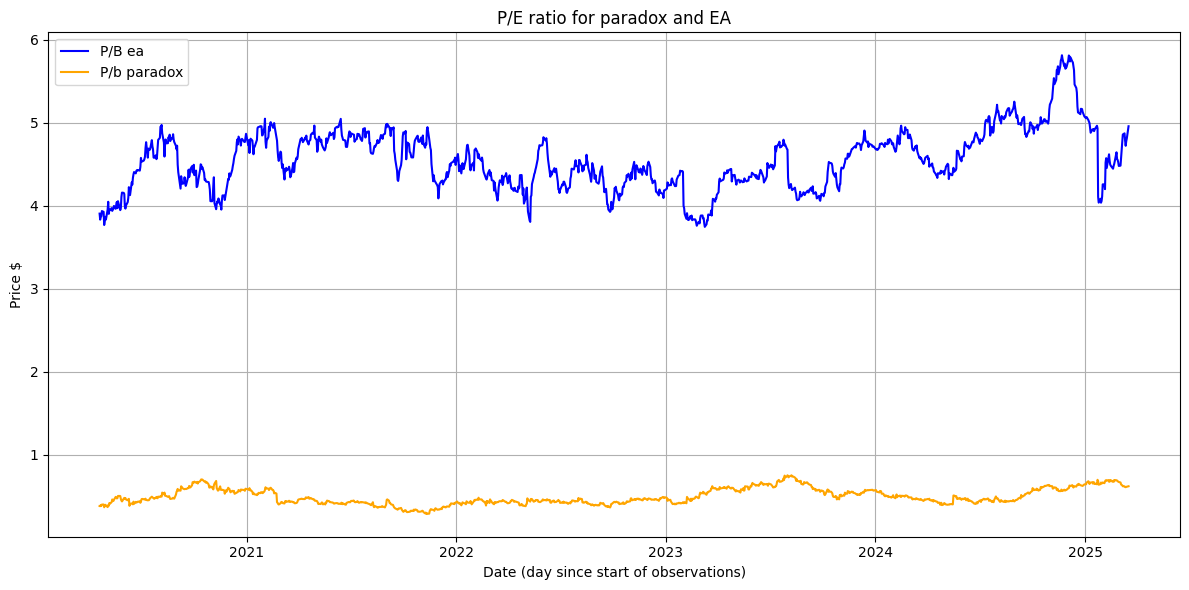

In [399]:
plt.figure(figsize=(12, 6))

plt.plot(ea_data.index, ea_data['P/B ratio'], label="P/B ea", color = "Blue")
plt.plot(paradox_data.index, paradox_data["P/B ratio"], label="P/b paradox", color = "Orange")

plt.xlabel("Date (day since start of observations)")
plt.ylabel("Price $")
plt.title("P/B ratio for paradox and EA")
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()

In [400]:
ea_data.head()

Price,Close,High,Low,Open,Volume,P/B ratio,P/E ratio,delta_trading_hours,delta_non_trading_hours
Ticker,EA,EA,EA,EA,EA,,,,
Date,,,,,,,,,
2020-04-20,112.587090,113.679690,111.133529,112.031025,2946100,3.905527,23.559155,0.556065,-0.712177
2020-04-21,110.499397,113.357729,109.367775,111.874912,2483200,3.833107,23.122300,-1.375515,1.063379
2020-04-22,111.767639,112.255409,108.460559,111.562777,2558900,3.877101,23.387683,0.204863,0.126812
2020-04-23,111.660324,113.777244,110.909161,111.894452,2737700,3.873378,23.365227,-0.234128,1.180403
2020-04-24,113.465073,113.826025,111.299372,112.840728,1753800,3.935983,23.742876,0.624345,1.619410


In [401]:
paradox_data.head()

Price,Close,High,Low,Open,Volume,P/B ratio,P/E ratio,delta_trading_hours,delta_non_trading_hours
Ticker,ETA.F,ETA.F,ETA.F,ETA.F,ETA.F,,,,
Date,,,,,,,,,
2020-04-20,10.601011,10.601011,10.540296,10.540296,170,0.384828,1.915254,0.060715,-0.340011
2020-04-21,10.576724,10.692085,10.261001,10.261001,420,0.383946,1.910866,0.315723,-0.072860
2020-04-22,10.928877,10.928877,10.503865,10.503865,357,0.396730,1.974488,0.425012,-0.261078
2020-04-23,10.667799,10.667799,10.667799,10.667799,0,0.387252,1.927320,0.000000,0.006071
2020-04-24,11.092811,11.092811,10.673870,10.673870,325,0.402681,2.004106,0.418941,-0.115361
